In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
holidays = pd.read_csv('./Data/holidays_events.csv')
items = pd.read_csv('./Data/items.csv')
stores = pd.read_csv('./Data/stores.csv')
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')
sample_submission = pd.read_csv('./Data/sample_submission.csv')
oil = pd.read_csv('./Data/oil.csv')
transactions = pd.read_csv('./Data/transactions.csv')

C:\Users\tomek\AppData\Local\Temp\ipykernel_8308\2623476265.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('./Data/train.csv')


# Przegląd poszczególnych tabel

Funkcja wyświetlająca liczbę wystąpień danych kategorycznych

In [7]:
def plot_categorical(df, column):
    counts = df[column].value_counts()

    counts.plot(kind='bar', edgecolor='black')
    plt.title(f'Liczba wystąpień w kolumnie {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba wystąpień')
    plt.show()
    print(counts)

Funkcja wyświetlająca procent wartości Na, Nan

In [4]:
def get_na_percentage(df):
    for column in df.columns:
        na_count = df[column].isna().sum()
        count = len(df[column])
        percentage = na_count / count
        print(column, round(percentage, 2))

Funkcja wyświetlająca rozkład kolumny

In [5]:
def distribution(df, column):
    data = df[column]

    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f'Rozkład kolumny {column}')
    plt.xlabel(column)
    plt.ylabel('częstotliwość')
    plt.show()

## Tabela holidays

### Przegląd tabeli oraz danych w niej zawartych

Wygląd tabeli

In [6]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


Sprawdzenie czy występują wartości Na, Nan

In [7]:
for column in holidays.columns:
  print(column, holidays[column].isna().sum())

date 0
type 0
locale 0
locale_name 0
description 0
transferred 0


Sprawdzenie typów danych

In [8]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


Sprawdzenie bardziej szczegółowych informacji o danych, ile ich jest, unikalne wartości, wartości które wystepują najczęściej itp.

In [9]:
holidays.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


Sprawdzenie z jakiego zakresu są to dane

In [10]:
print(holidays['date'].min())
print(holidays['date'].max())

2012-03-02
2017-12-26


### Wizualizacje, rozkłady i liczba wystąpień

Liczba wystąpień ***typu wydarzenia***, gdzie:
- ***Holiday*** - Święta państwowe, religijne np. Boże Narodzenie, Nowy Rok
- ***Event*** - Wydarzenia specjalne, lokalne np. koncerty, festiwale
- ***Additional*** - Dodatkowe dni wolne lub dni przesunięte w kalendarzu
- ***Bridge*** - Dodatkowy dzień niepracujący stworzony w celu zrobienia "Długiego weekendu"
- ***Transfer*** - Dni świąteczne, które zostały przeniesione na inny dzień

Reszta dni, które są określone jako Nan to dni pracujące.

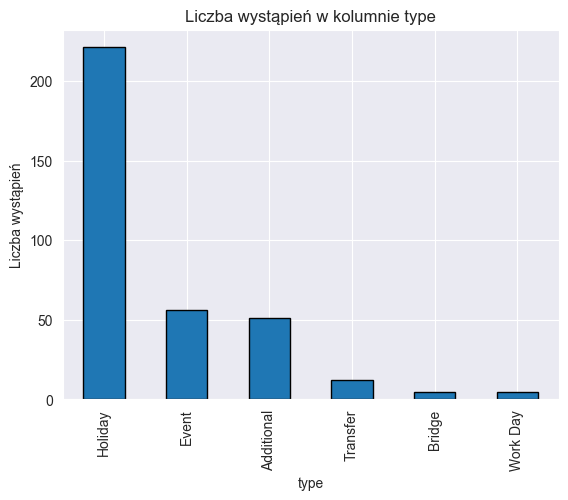

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64


In [11]:
plot_categorical(holidays, 'type')

Liczba wystąpień w kolumnie ***Locale***

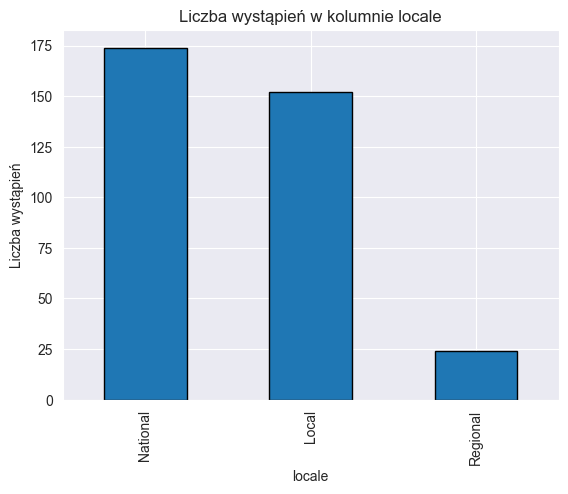

locale
National    174
Local       152
Regional     24
Name: count, dtype: int64


In [12]:
plot_categorical(holidays, 'locale')

Liczba wystąpień w kolumnie ***locale_name***

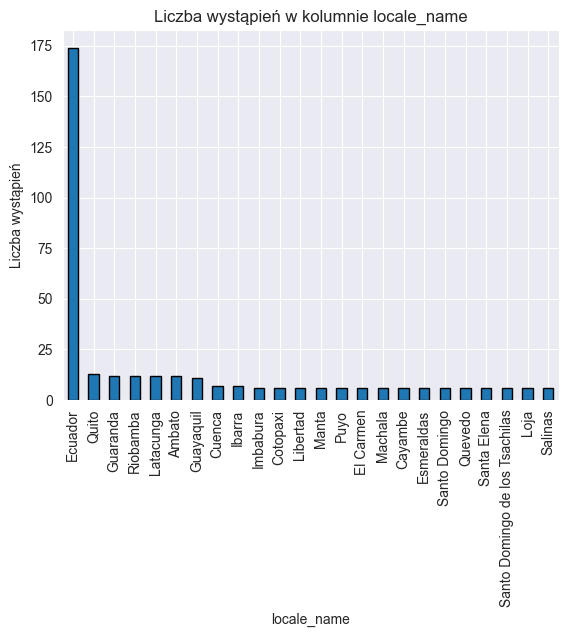

locale_name
Ecuador                           174
Quito                              13
Guaranda                           12
Riobamba                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Imbabura                            6
Cotopaxi                            6
Libertad                            6
Manta                               6
Puyo                                6
El Carmen                           6
Machala                             6
Cayambe                             6
Esmeraldas                          6
Santo Domingo                       6
Quevedo                             6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Loja                                6
Salinas                             6
Name: count, dtype: int64


In [13]:
plot_categorical(holidays, 'locale_name')

Liczba wystąpień w kolumnie ***transferred***

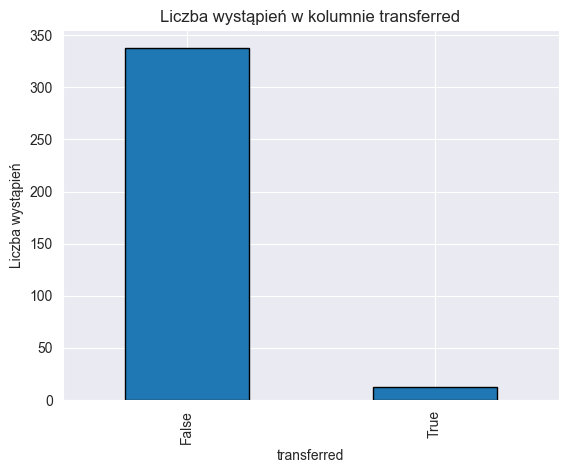

transferred
False    338
True      12
Name: count, dtype: int64


In [14]:
plot_categorical(holidays, 'transferred')

## Tabela items

### Przegląd tabeli oraz danych w niej zawartych

Wygląd tabeli

Kolumna ***perishable*** oznacza czy produkt jest podatny na psucie się (1-tak, 0-nie)

In [15]:
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


Sprawdzenie czy występują wartości brakujące

In [12]:
for column in items.columns:
  print(column, items[column].isna().sum())

item_nbr 0
family 0
class 0
perishable 0


Wyświetlenie informacji o tabeli, typy danych, liczba wystąpień itp.

In [17]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB


In [18]:
print(len(items['item_nbr'].unique()))

4100


Sprawdzenie ile ***klas*** zawiera się w tabeli

In [19]:
print(len(items['class'].unique()))

337


### Wizualizacje, rozkłady i liczba wystąpień

Liczba wystąpień w kolumnie ***family***

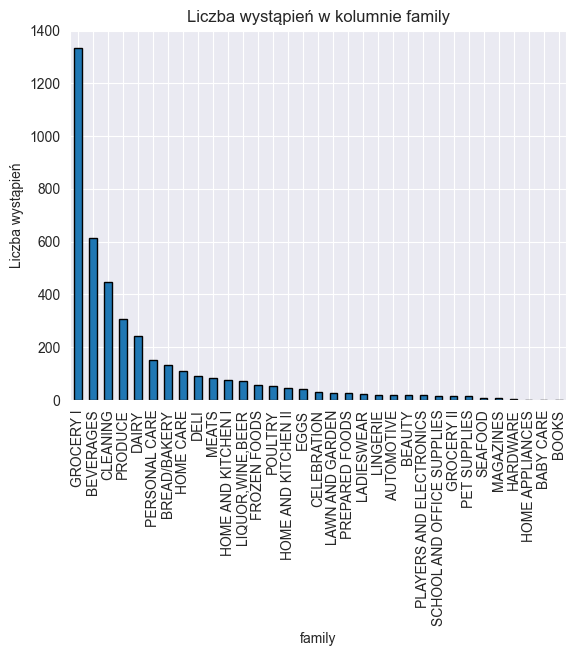

family
GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
LINGERIE                        20
AUTOMOTIVE                      20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES    

In [20]:
plot_categorical(items, 'family')

Liczba wystąpień w kolumnie ***perishable***

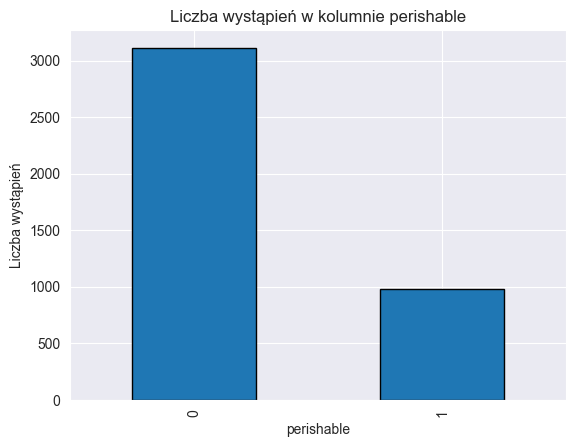

perishable
0    3114
1     986
Name: count, dtype: int64


In [21]:
plot_categorical(items, 'perishable')

Liczba wystąpień w kolumnie ***class***

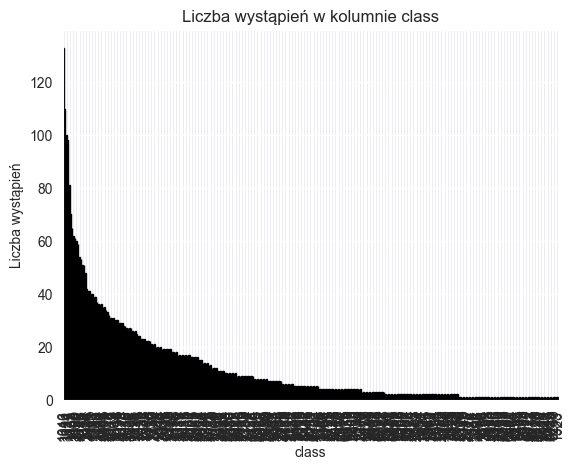

class
1016    133
1040    110
1124    100
1034     98
1122     81
       ... 
6233      1
5244      1
5250      1
1083      1
1328      1
Name: count, Length: 337, dtype: int64


In [22]:
plot_categorical(items, 'class')

## Tabela oil

### Przegląd tabeli oraz danych w niej zawartych

Wyświetlenie tabeli

In [23]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


Wyświetlenie informacji o tabeli, takich jak typy danych, liczba wysąpień wartości niebrakujących

In [24]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


Na 1218 dni, 43 są brakujące, można uznać, że jest to błąd systemu i łatwo je uzupełnić, ponieważ nie ma takich dużych wachań z dnia na dzień

In [25]:
for column in oil.columns:
  print(column, oil[column].isna().sum())

get_na_percentage(oil)

date 0
dcoilwtico 43
date 0.0
dcoilwtico 0.04


Sprawdzenie zakresu dat z jakich pochodzą dane

In [26]:
print(oil['date'].min())
print(oil['date'].max())

2013-01-01
2017-08-31


### Wizualizacje, rozkłady i liczba wystąpień

Rozkład kolumny, która mówi nam o wartości paliwa w danym dniu

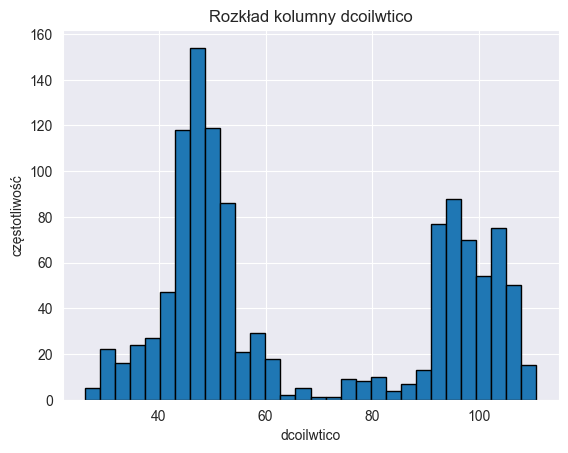

In [27]:
distribution(oil, 'dcoilwtico')

Wykres trendu ceny paliwa w czasie.

Text(0, 0.5, 'cena')

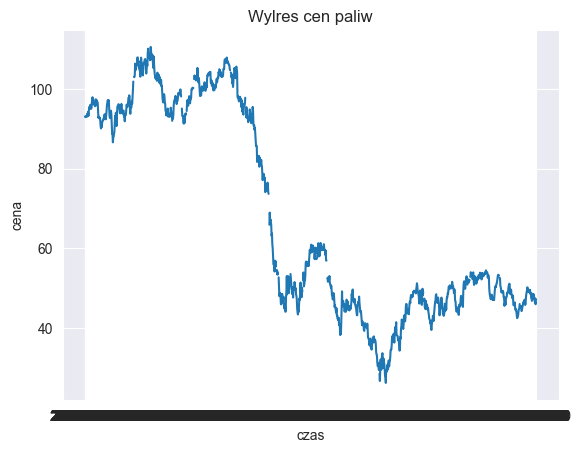

In [28]:
x = oil['date']
y = oil['dcoilwtico']

plt.plot(x, y)
plt.title('Wylres cen paliw')
plt.xlabel('czas')
plt.ylabel('cena')

## Tabela Sample_submission to po prostu tabela wzorcowa w jaki sposób ma wyglądać wynik

## Tabela stores

### Przegląd tabeli oraz danych w niej zawartych

Wyświetlenie tabeli

Kolumna ***type*** oznacza typ sklepu pod względem jego wielkości

Kolumna ***cluster*** oznacza podobieństwo sklepu do innych sklepów pod względem klientów

In [29]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


Wyświetlenie informacji o tabeli, typ danych, liczba wystąpień itp.

In [30]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [31]:
stores.describe(include='all')

,store_nbr,city,state,type,cluster
count,54.000000,54,54,54,54.000000
unique,NaN,22,16,5,NaN
top,NaN,Quito,Pichincha,D,NaN
freq,NaN,18,19,18,NaN
mean,27.500000,NaN,NaN,NaN,8.481481
std,15.732133,NaN,NaN,NaN,4.693395
min,1.000000,NaN,NaN,NaN,1.000000
25%,14.250000,NaN,NaN,NaN,4.000000
50%,27.500000,NaN,NaN,NaN,8.500000
75%,40.750000,NaN,NaN,NaN,13.000000


### Wizualizacje, rozkłady i liczba wystąpień

Liczba wystąpień w kolumnie ***city***

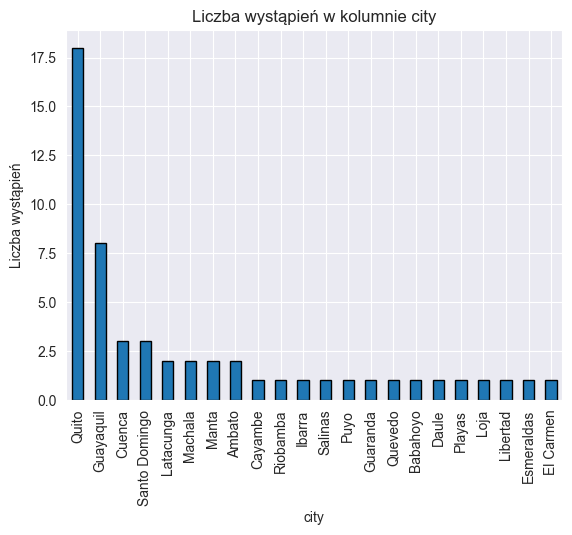

city
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Latacunga         2
Machala           2
Manta             2
Ambato            2
Cayambe           1
Riobamba          1
Ibarra            1
Salinas           1
Puyo              1
Guaranda          1
Quevedo           1
Babahoyo          1
Daule             1
Playas            1
Loja              1
Libertad          1
Esmeraldas        1
El Carmen         1
Name: count, dtype: int64


In [32]:
plot_categorical(stores, 'city')

Liczba wystąpień w kolumnie ***state***

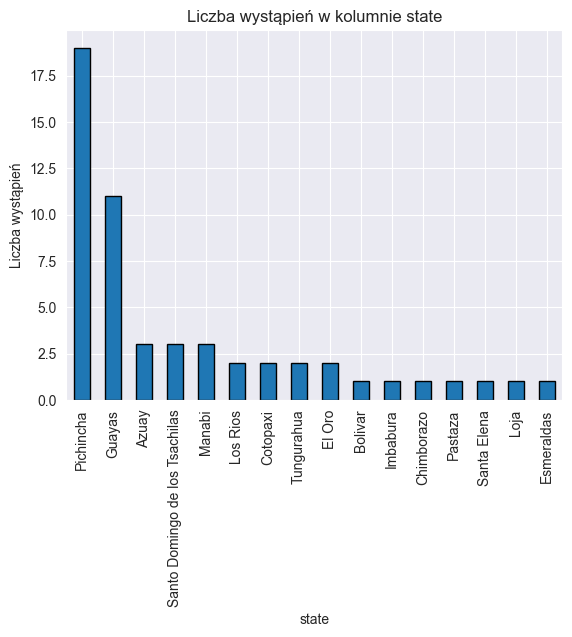

state
Pichincha                         19
Guayas                            11
Azuay                              3
Santo Domingo de los Tsachilas     3
Manabi                             3
Los Rios                           2
Cotopaxi                           2
Tungurahua                         2
El Oro                             2
Bolivar                            1
Imbabura                           1
Chimborazo                         1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: count, dtype: int64


In [33]:
plot_categorical(stores, 'state')

Liczba wystąpień w kolumnie ***cluster***

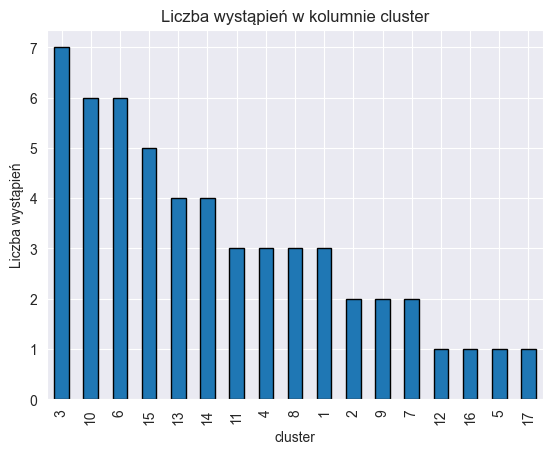

cluster
3     7
10    6
6     6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
2     2
9     2
7     2
12    1
16    1
5     1
17    1
Name: count, dtype: int64


In [34]:
plot_categorical(stores, 'cluster')

Liczba wystąpień w kolumnie ***type***

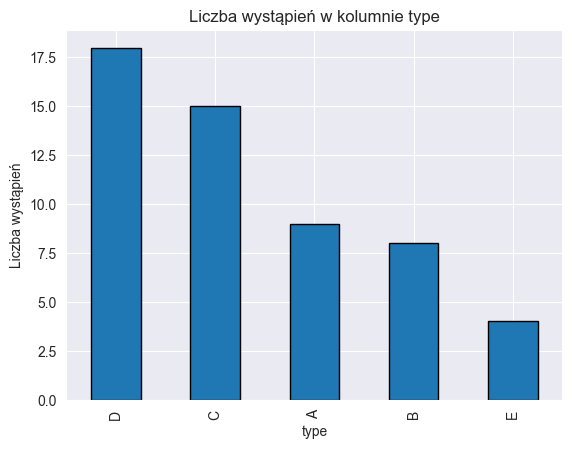

type
D    18
C    15
A     9
B     8
E     4
Name: count, dtype: int64


In [35]:
plot_categorical(stores, 'type')

## Tabela test

### Przegląd tabeli oraz danych w niej zawartych

Wyświetlenie tabeli

In [36]:
test

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False
...,...,...,...,...,...
3370459,128867499,2017-08-31,54,2132163,False
3370460,128867500,2017-08-31,54,2132318,False
3370461,128867501,2017-08-31,54,2132945,False
3370462,128867502,2017-08-31,54,2132957,False


Sprawdzenie tabeli pod kątem wartości brakujących

In [37]:
for column in test.columns:
  print(column, test[column].isna().sum())

id 0
date 0
store_nbr 0
item_nbr 0
onpromotion 0


Wyświetlenie informacji o tabeli, typ danych, liczba wystąpień itp

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           int64 
 1   date         object
 2   store_nbr    int64 
 3   item_nbr     int64 
 4   onpromotion  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 106.1+ MB


In [39]:
test.describe(include='all')

,id,date,store_nbr,item_nbr,onpromotion
count,3.370464e+06,3370464,3.370464e+06,3.370464e+06,3370464
unique,NaN,16,NaN,NaN,2
top,NaN,2017-08-16,NaN,NaN,False
freq,NaN,210654,NaN,NaN,3171867
mean,1.271823e+08,NaN,2.750000e+01,1.244798e+06,NaN
std,9.729693e+05,NaN,1.558579e+01,5.898362e+05,NaN
min,1.254970e+08,NaN,1.000000e+00,9.699500e+04,NaN
25%,1.263397e+08,NaN,1.400000e+01,8.053210e+05,NaN
50%,1.271823e+08,NaN,2.750000e+01,1.294665e+06,NaN
75%,1.280249e+08,NaN,4.100000e+01,1.730015e+06,NaN


Sprawdzenie zakresu dat z jakich są dane

In [40]:
print(test['date'].min())
print(test['date'].max())

2017-08-16
2017-08-31


### Wizualizacje, rozkłady i liczba wystąpień

Liczba wystąpień w kolumnie ***onpromotion***

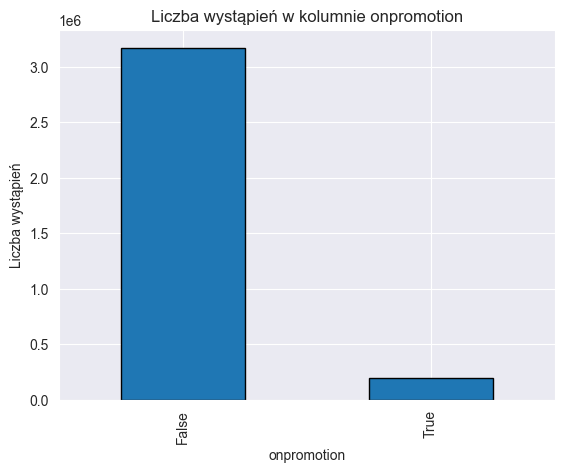

onpromotion
False    3171867
True      198597
Name: count, dtype: int64


In [41]:
plot_categorical(test, 'onpromotion')

## Tabela train

### Przegląd tabeli oraz danych w niej zawartych

Wyświetlenie tabeli

In [42]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True


Wyświetlenie podstawowych informacji o tabeli, liczba wystąpień, typy danych itp.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ GB


In [44]:
train.describe(include='all')

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
count,1.254970e+08,125497040,1.254970e+08,1.254970e+08,1.254970e+08,103839389
unique,NaN,1684,NaN,NaN,NaN,2
top,NaN,2017-07-01,NaN,NaN,NaN,False
freq,NaN,118194,NaN,NaN,NaN,96028767
mean,6.274852e+07,NaN,2.746458e+01,9.727692e+05,8.554865e+00,NaN
std,3.622788e+07,NaN,1.633051e+01,5.205336e+05,2.360515e+01,NaN
min,0.000000e+00,NaN,1.000000e+00,9.699500e+04,-1.537200e+04,NaN
25%,3.137426e+07,NaN,1.200000e+01,5.223830e+05,2.000000e+00,NaN
50%,6.274852e+07,NaN,2.800000e+01,9.595000e+05,4.000000e+00,NaN
75%,9.412278e+07,NaN,4.300000e+01,1.354380e+06,9.000000e+00,NaN


Sprawdzenie zakresu dat z jakich pochodzą dane

In [45]:
print(train['date'].min())
print(train['date'].max())

2013-01-01
2017-08-15


Sprawdzenie tabeli pod kątem wartości brakujących

In [13]:
for column in train.columns:
  print(column, train[column].isna().sum())

id 0
date 0
store_nbr 0
item_nbr 0
unit_sales 0
onpromotion 21657651


### Wizualizacje, rozkłady i liczba wystąpień

Wyświetlenie trendu sprzedaży wg daty

Można zauważyć, że za każdem razem na początku roku sprzedaż drastycznie spada.

Text(0, 0.5, 'Jednostka sprzedaży')

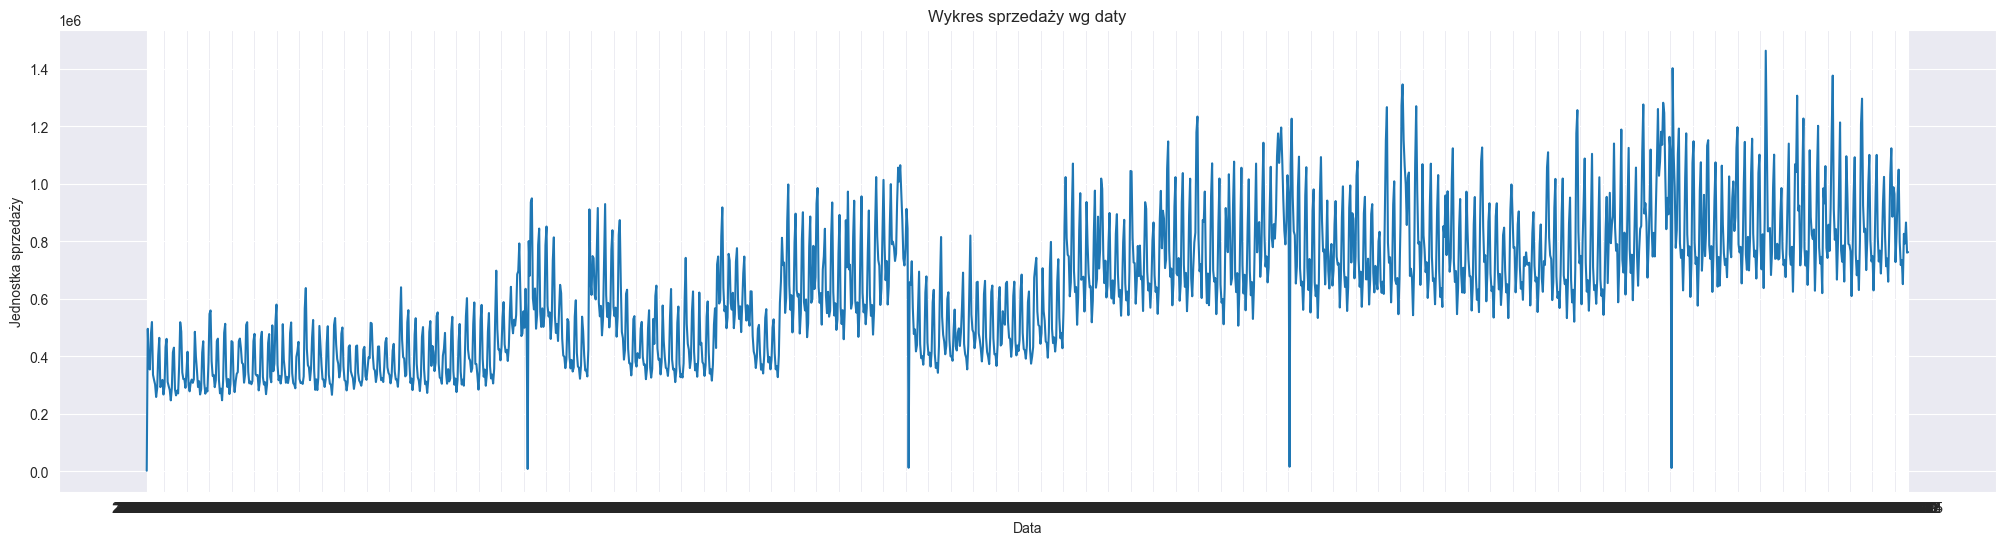

In [47]:

sales_per_date = train.groupby('date')['unit_sales'].sum().reset_index()

plt.figure(figsize=(25, 6))
plt.plot(sales_per_date['date'], sales_per_date['unit_sales'])
plt.title('Wykres sprzedaży wg daty')
plt.xlabel('Data')
plt.ylabel('Jednostka sprzedaży')

Liczba wystąpień w kolumnie ***onpromotion***

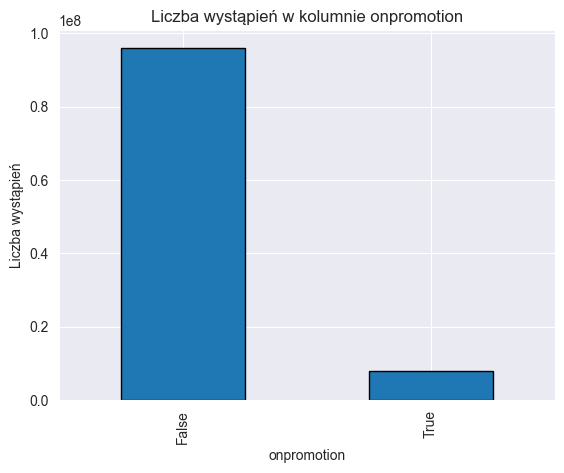

onpromotion
False    96028767
True      7810622
Name: count, dtype: int64


In [48]:
plot_categorical(train, 'onpromotion')

Zbadanie średniej sprzedaży produktów na promocji vs bez promocji

Na wykresie widać, że produkty które są na promocji średnio sprzedają się lepiej o około 4 jednostki.

                  count       mean        std      min  25%  50%   75%  \
onpromotion                                                              
False        96028767.0   8.088135  22.549599 -15372.0  2.0  4.0   8.0   
True          7810622.0  13.466666  39.704772     -4.0  3.0  6.0  13.0   

                 max  
onpromotion           
False        89440.0  
True         17146.0  


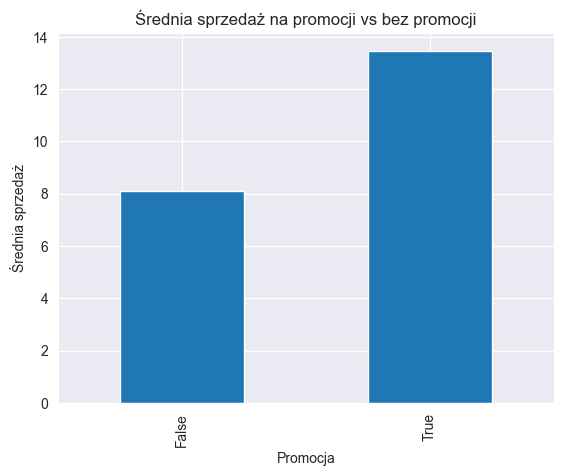

In [49]:
summary = train.groupby("onpromotion")["unit_sales"].describe()
print(summary)

train.groupby("onpromotion")["unit_sales"].mean().plot(kind="bar")
plt.title("Średnia sprzedaż na promocji vs bez promocji")
plt.xlabel("Promocja")
plt.ylabel("Średnia sprzedaż")
plt.show()

Wyświetlenie 10 najlepiej sprzedających się produktów

Text(0, 0.5, 'Sprzedaż')

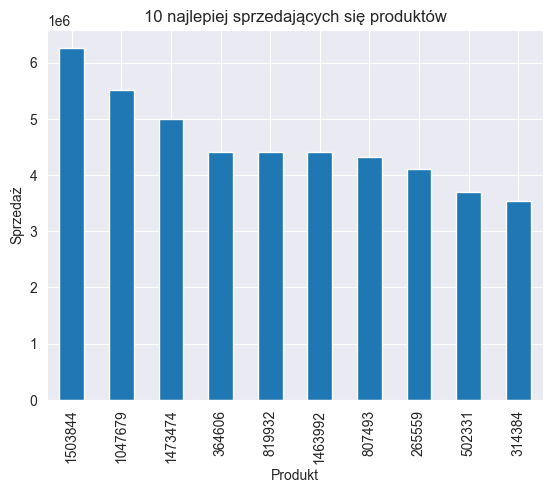

In [50]:
train.groupby('item_nbr')['unit_sales'].sum().nlargest(10).plot(kind="bar")
plt.title('10 najlepiej sprzedających się produktów')
plt.xlabel('Produkt')
plt.ylabel('Sprzedaż')

Wyświetlenie 10 najlepszych sklepów pod względem sprzedanych produktów

Text(0, 0.5, 'Sprzedaż')

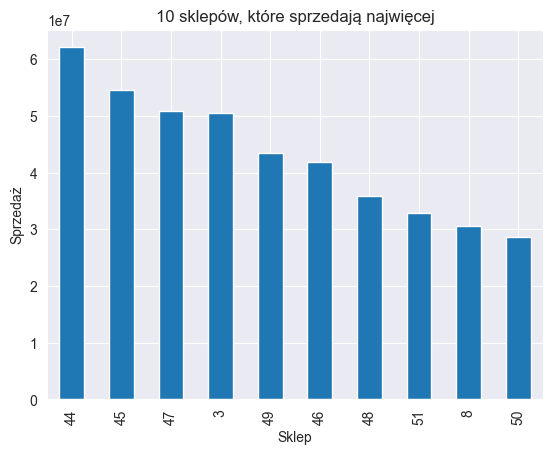

In [51]:
train.groupby('store_nbr')['unit_sales'].sum().nlargest(10).plot(kind="bar")
plt.title('10 sklepów, które sprzedają najwięcej')
plt.xlabel('Sklep')
plt.ylabel('Sprzedaż')

## Tabela transactions

### Przegląd tabeli oraz danych w niej zawartych

Wyświetlenie tabeli

In [52]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


Wyświetlenie informacji o tabeli takich jak typ danych, liczba wystąpień wartości niebrakujących

In [53]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [54]:
transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


Sprawdzenie zakresu dat

In [55]:
print(transactions['date'].min())
print(transactions['date'].max())

2013-01-01
2017-08-15


Sprawdzenie danych pod kątem wartości brakujących

In [56]:
for column in transactions.columns:
  print(column, transactions[column].isna().sum())

date 0
store_nbr 0
transactions 0


### Wizualizacje, rozkłady i liczba wystąpień

Licza transakcji wg daty, można zauważyć dosyć regularne wzrosty

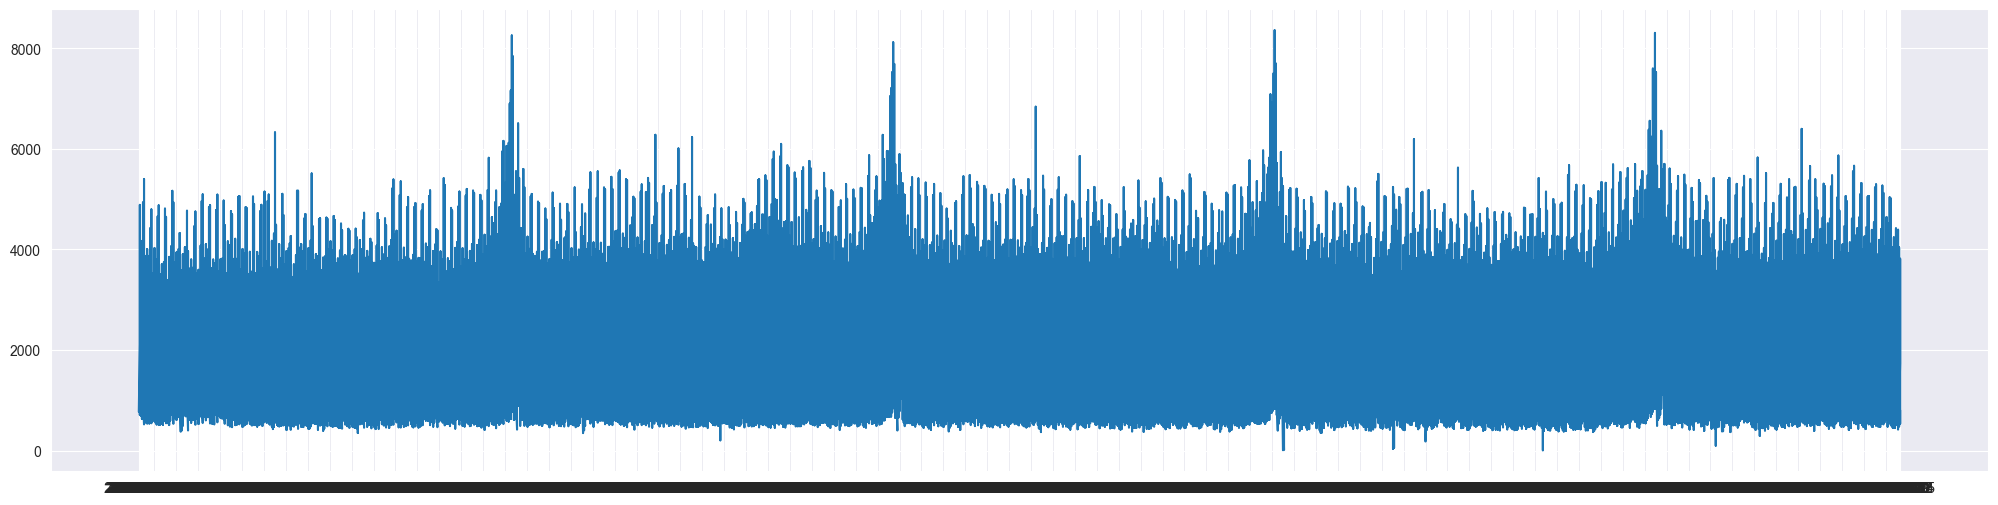

In [57]:
x = transactions['date']
y = transactions['transactions']
plt.figure(figsize=(25, 6))
plt.plot(x, y)

Wyświetlenie 10 sklepów, które miały najwięcej transakcji

<Axes: xlabel='store_nbr'>

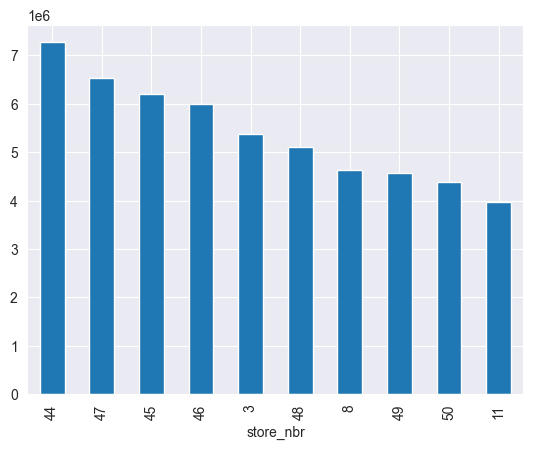

In [58]:
data = transactions.groupby('store_nbr')['transactions'].sum()

data.nlargest(10).plot(kind='bar')

# Zależności między tabelami

## Zależność sprzedaży od ceny paliwa

In [59]:
daily_sales = train.groupby('date')['unit_sales'].sum().reset_index()
data = daily_sales.merge(oil, on='date')

data["dcoilwtico"].fillna(method="ffill", inplace=True)
data["sales_ma7"] = data["unit_sales"].rolling(7).mean()
data["oil_ma7"] = data["dcoilwtico"].rolling(7).mean()

C:\Users\tomek\AppData\Local\Temp\ipykernel_12656\2655145403.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["dcoilwtico"].fillna(method="ffill", inplace=True)
C:\Users\tomek\AppData\Local\Temp\ipykernel_12656\2655145403.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["dcoilwtico"].fillna(method="ffill", inplace=True)


Wykres przedstawia zależność sprzedaży od cen ropy. Cena ropy została uśredniona do tygodniowej w celu większego uwydatnienia zależności sprzedaży od jej ceny.

Można zauważyć, że gdy cena ropy drastycznie spada, sprzedaż rośnie, jescze szybciej niż jak cena ropy była wyższa

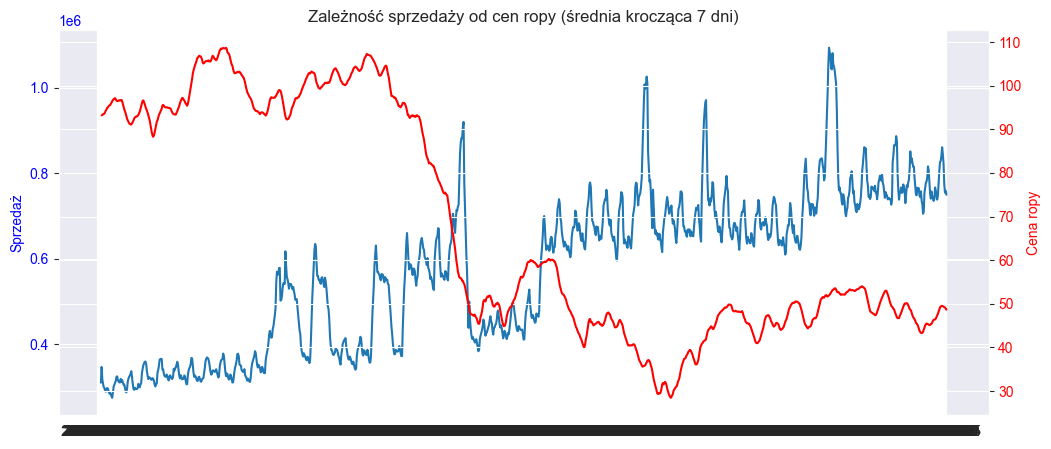

In [60]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(data["date"], data["sales_ma7"], label="7-dniowa średnia sprzedaży")
ax1.set_ylabel("Sprzedaż", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(data["date"], data["oil_ma7"], color="red", label="7-dniowa średnia cena ropy")
ax2.set_ylabel("Cena ropy", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Zależność sprzedaży od cen ropy (średnia krocząca 7 dni)")
plt.show()

Wykres punktowy zależności sprzedaży od paliwa. Możemy już tutaj zauważyć korelację liniową pomiędzy tymi dwoma zmiennymi, mianowicie gdy cena paliwa rośnie, to sprzedaż spada.

Text(0, 0.5, 'Sprzedaż')

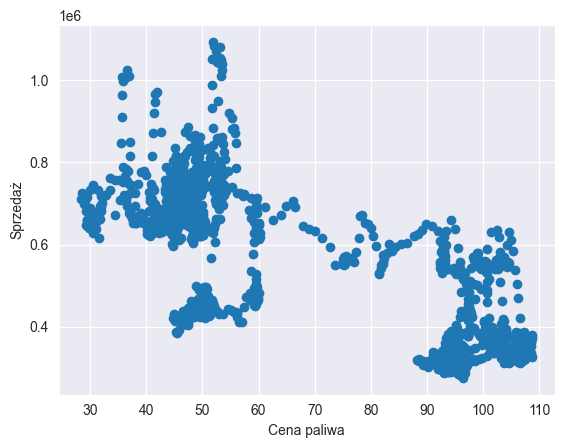

In [61]:
plt.scatter(data['oil_ma7'], data['sales_ma7'])
plt.xlabel("Cena paliwa")
plt.ylabel("Sprzedaż")

Macierz korelacji. Potwierdza poprzednie stwierdzenie wartością -0,76, które jest dosyć silną korelacją.

In [62]:
corr = data[["sales_ma7", "oil_ma7"]].corr()
print(corr)

           sales_ma7   oil_ma7
sales_ma7   1.000000 -0.756404
oil_ma7    -0.756404  1.000000


## Zależność sprzedaży od świąt

In [63]:

daily_sales = train.groupby("date")["unit_sales"].sum().reset_index()

daily_sales["date"] = pd.to_datetime(daily_sales["date"]).dt.date
holidays["date"] = pd.to_datetime(holidays["date"]).dt.date

data = daily_sales.merge(holidays, on='date')

In [64]:
data.groupby('type')['unit_sales'].describe()
# data

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Additional,38.0,868881.902579,259971.010666,309243.7900,688328.59300,921775.065,1.071772e+06,1282145.517
Bridge,3.0,796110.021667,120005.367890,657763.3920,758115.80400,858468.216,8.652833e+05,872098.457
Event,56.0,758187.450516,236854.514919,329408.0674,590181.08745,741969.586,8.676411e+05,1345920.605
Holiday,171.0,638711.537618,260413.866519,2511.6190,443173.90900,613973.032,7.910228e+05,1463083.963
Transfer,9.0,833535.931000,266121.336982,402913.8490,737029.56500,826373.722,8.526892e+05,1402305.371
Work Day,5.0,663184.507600,253011.498553,403257.2120,477350.12100,569956.908,9.298028e+05,935555.525


Wyświetlenie informacji odnośnie średniej sprzedaży w różnego rodzaju świętach a zwykłych dniach

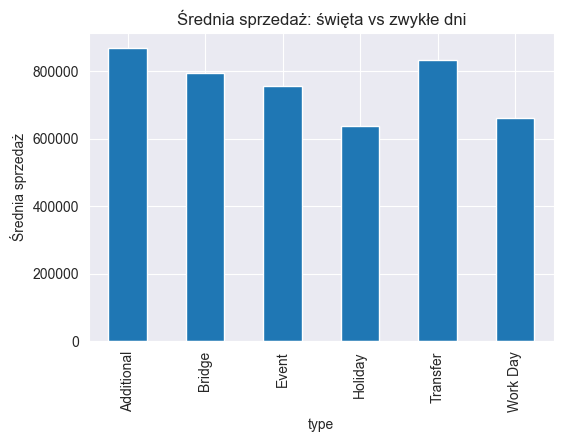

In [65]:
data.groupby("type")["unit_sales"].mean().plot(kind="bar", figsize=(6,4))
plt.title("Średnia sprzedaż: święta vs zwykłe dni")
plt.ylabel("Średnia sprzedaż")
plt.show()

Dodanie kolumny day_before i day_after, które mają wartości True i False jeżeli odpowiednio:
- ***dzień znajdował się przed świętem***
- ***dzień znajdował się po święcie***

In [66]:
holidays["day_before"] = holidays["date"] - pd.Timedelta(days=1)
holidays["day_after"] = holidays["date"] + pd.Timedelta(days=1)
data = daily_sales.merge(holidays[["date", "type"]], on="date", how="left")

data["is_day_before_holiday"] = data["date"].isin(holidays["day_before"])
data["is_day_after_holiday"] = data["date"].isin(holidays["day_after"])

In [67]:
data['type'].fillna("Normal Day", inplace=True)

C:\Users\tomek\AppData\Local\Temp\ipykernel_12656\462587289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['type'].fillna("Normal Day", inplace=True)


In [68]:
data

,date,unit_sales,type,is_day_before_holiday,is_day_after_holiday
0,2013-01-01,2511.619,Holiday,False,True
1,2013-01-02,496092.418,Normal Day,False,True
2,2013-01-03,361429.231,Normal Day,False,False
3,2013-01-04,354459.677,Normal Day,True,False
4,2013-01-05,477350.121,Work Day,False,False
...,...,...,...,...,...
1709,2017-08-11,826373.722,Transfer,False,True
1710,2017-08-12,792630.535,Normal Day,False,True
1711,2017-08-13,865639.677,Normal Day,False,False
1712,2017-08-14,760922.406,Normal Day,True,False


Na wykresie można od razu zauważyć wzrost średniej sprzedaży w dniach, które są przed lub po świętach względem dni pracujących i różnych typów świąt

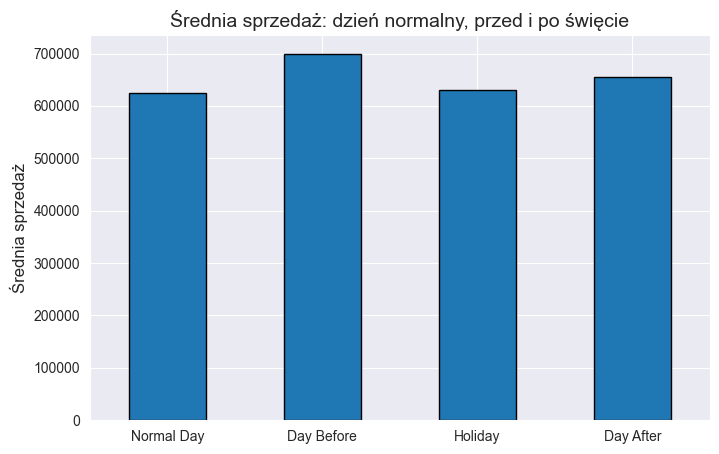

holiday_context
Normal Day    625105.697335
Day Before    699823.908380
Holiday       629745.431355
Day After     654883.782621
Name: unit_sales, dtype: float64


In [69]:
def classify_day(row):
    if row["is_day_before_holiday"]:
        return "Day Before"
    elif row["is_day_after_holiday"]:
        return "Day After"
    elif row['type'] != 'Normal Day':
        return "Holiday"
    else:
        return "Normal Day"

data["holiday_context"] = data.apply(classify_day, axis=1)

avg_sales = data.groupby("holiday_context")["unit_sales"].mean().reindex(
    ["Normal Day", "Day Before", "Holiday", "Day After"]
)

plt.figure(figsize=(8,5))
avg_sales.plot(kind="bar",  edgecolor="black")

plt.title("Średnia sprzedaż: dzień normalny, przed i po święcie", fontsize=14)
plt.ylabel("Średnia sprzedaż", fontsize=12)
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

print(avg_sales)

## Wizualizacje sprzedaży poszczególnych produktów wydług numeru, rodziny i klasy

In [70]:
data = train.merge(items, on='item_nbr', how='left')

data

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1
1,1,2013-01-01,25,105574,1.0,NaN,GROCERY I,1045,0
2,2,2013-01-01,25,105575,2.0,NaN,GROCERY I,1045,0
3,3,2013-01-01,25,108079,1.0,NaN,GROCERY I,1030,0
4,4,2013-01-01,25,108701,1.0,NaN,DELI,2644,1
...,...,...,...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0
125497036,125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0
125497037,125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0
125497038,125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0


Średnia sprzedaż wg parametru "psucia się" widać, że jeżeli produkt szybko się psuje to sprzedaż jest większa

Text(0, 0.5, 'Sprzedaż')

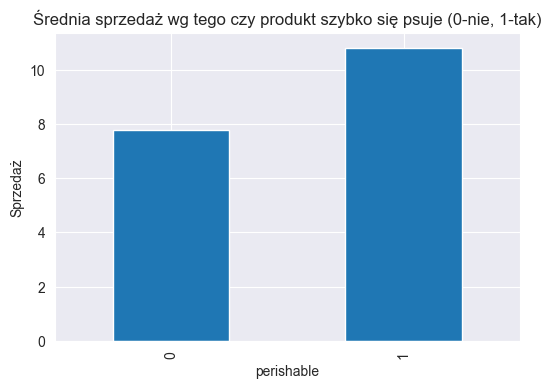

In [71]:
data.groupby('perishable')['unit_sales'].mean().plot(kind="bar", figsize=(6,4))
plt.title("Średnia sprzedaż wg tego czy produkt szybko się psuje (0-nie, 1-tak)")
plt.ylabel("Sprzedaż")

Wyświetlenie 10 średnio najlepiej sprzedającej się rodziny produktów

Text(0, 0.5, 'Sprzedaż')

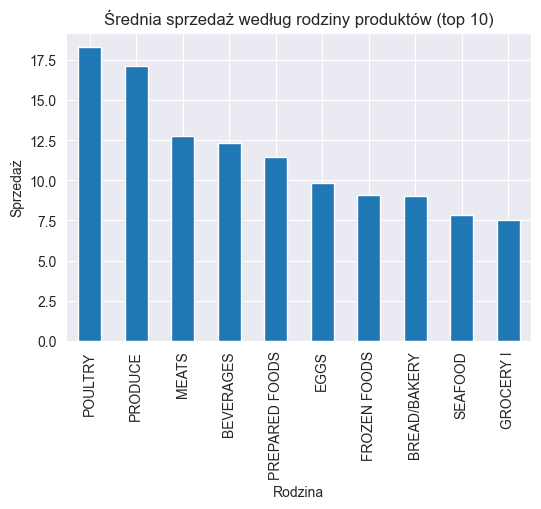

In [72]:
data.groupby('family')['unit_sales'].mean().nlargest(10).plot(kind="bar", figsize=(6,4))
plt.title('Średnia sprzedaż według rodziny produktów (top 10)')
plt.xlabel('Rodzina')
plt.ylabel('Sprzedaż')

Wyświetlenie 10 średnio najlepiej sprzedającej się klasy produktów

Text(0, 0.5, 'Sprzedaż')

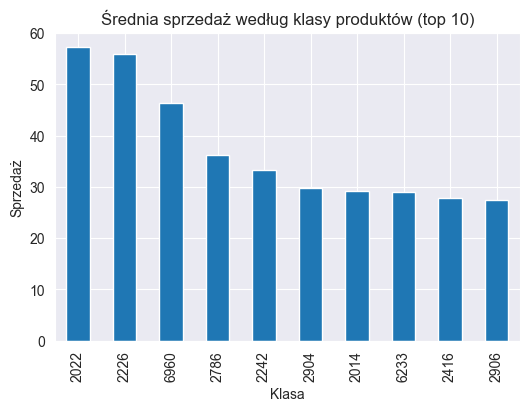

In [73]:
data.groupby('class')['unit_sales'].mean().nlargest(10).plot(kind="bar", figsize=(6,4))
plt.title('Średnia sprzedaż według klasy produktów (top 10)')
plt.xlabel('Klasa')
plt.ylabel('Sprzedaż')

## Wizualizacje sprzedaży według sklepów, regionu, stanu

In [74]:
data = train.merge(stores, on='store_nbr', how='left')
data

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,25,103665,7.0,NaN,Salinas,Santa Elena,D,1
1,1,2013-01-01,25,105574,1.0,NaN,Salinas,Santa Elena,D,1
2,2,2013-01-01,25,105575,2.0,NaN,Salinas,Santa Elena,D,1
3,3,2013-01-01,25,108079,1.0,NaN,Salinas,Santa Elena,D,1
4,4,2013-01-01,25,108701,1.0,NaN,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False,El Carmen,Manabi,C,3
125497036,125497036,2017-08-15,54,2106464,1.0,True,El Carmen,Manabi,C,3
125497037,125497037,2017-08-15,54,2110456,192.0,False,El Carmen,Manabi,C,3
125497038,125497038,2017-08-15,54,2113914,198.0,True,El Carmen,Manabi,C,3


Wyświetlenie sumy sprzedaży wedug miasta. Od razu widać, że miasto Quito dominuje pozostałe pod tym względem

Text(0, 0.5, 'Sprzedaż')

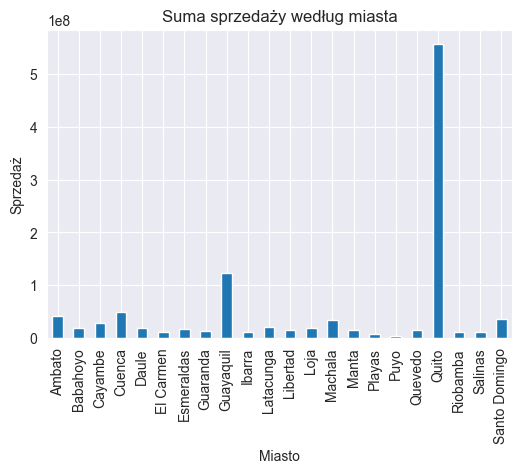

In [75]:
data.groupby('city')['unit_sales'].sum().plot(kind="bar", figsize=(6,4))
plt.title('Suma sprzedaży według miasta')
plt.xlabel("Miasto")
plt.ylabel('Sprzedaż')

Wyświetlenie sumy sprzedaży wedug stanu. Od razu widać, że stan pichincha dominuje pozostałe pod tym względem można wysnuć wysoce prawdopodobny wniosek iż miasto, które miało najlepszą sprzedaż w poprzednim wykresie znajduje się właśnie w tym stanie.

Text(0, 0.5, 'Sprzedaż')

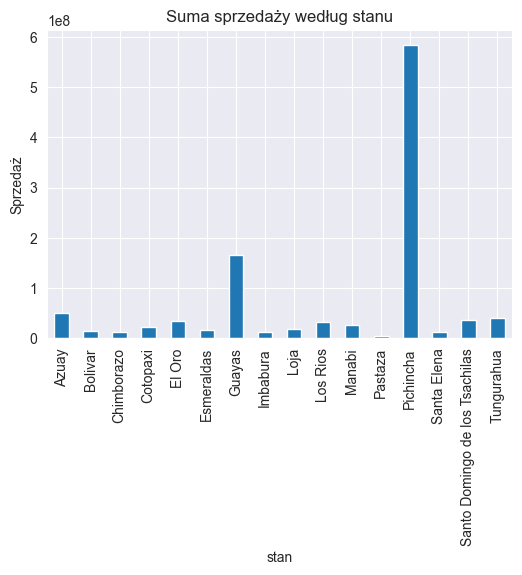

In [76]:
data.groupby('state')['unit_sales'].sum().plot(kind="bar", figsize=(6,4))
plt.title('Suma sprzedaży według stanu')
plt.xlabel("stan")
plt.ylabel('Sprzedaż')

Średnia sprzedaż według **typu sklepu**. Sklepy typu A sprzedają najwięcej produktów, ponieważ są największe, natomiast pozostałe typy nie różńią się tak bardzo od siebie.

Text(0, 0.5, 'Sprzedaż')

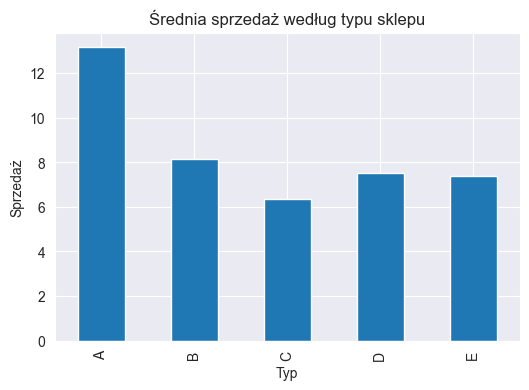

In [77]:
data.groupby('type')['unit_sales'].mean().plot(kind="bar", figsize=(6,4))
plt.title('Średnia sprzedaż według typu sklepu')
plt.xlabel("Typ")
plt.ylabel('Sprzedaż')

Średnia sprzedaż według **klastra** w którym znajduje się sklep

Text(0, 0.5, 'Sprzedaż')

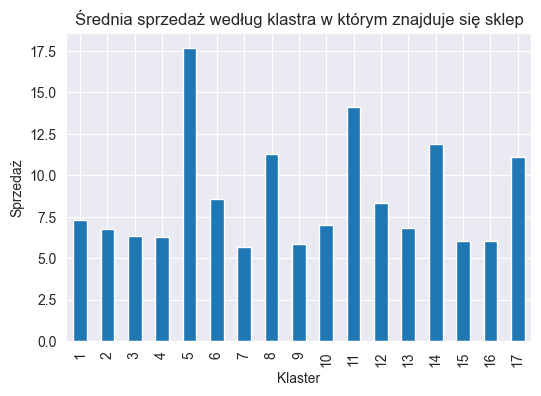

In [78]:
data.groupby('cluster')['unit_sales'].mean().plot(kind="bar", figsize=(6,4))
plt.title('Średnia sprzedaż według klastra w którym znajduje się sklep')
plt.xlabel("Klaster")
plt.ylabel('Sprzedaż')

## Sprzedaż a transakcje

In [3]:
train["date"] = pd.to_datetime(train["date"]).dt.date
transactions["date"] = pd.to_datetime(transactions["date"]).dt.date

data = train.merge(transactions, on=["store_nbr", "date"], how="left")

In [4]:
data

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,transactions
0,0,2013-01-01,25,103665,7.0,NaN,770.0
1,1,2013-01-01,25,105574,1.0,NaN,770.0
2,2,2013-01-01,25,105575,2.0,NaN,770.0
3,3,2013-01-01,25,108079,1.0,NaN,770.0
4,4,2013-01-01,25,108701,1.0,NaN,770.0
...,...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False,802.0
125497036,125497036,2017-08-15,54,2106464,1.0,True,802.0
125497037,125497037,2017-08-15,54,2110456,192.0,False,802.0
125497038,125497038,2017-08-15,54,2113914,198.0,True,802.0


Wyświetlenie sumy sprzedaży w zależności od liczby transakcji. Od razu widać liniową zależność i dodatnią korelację, która jest wręcz książkowa

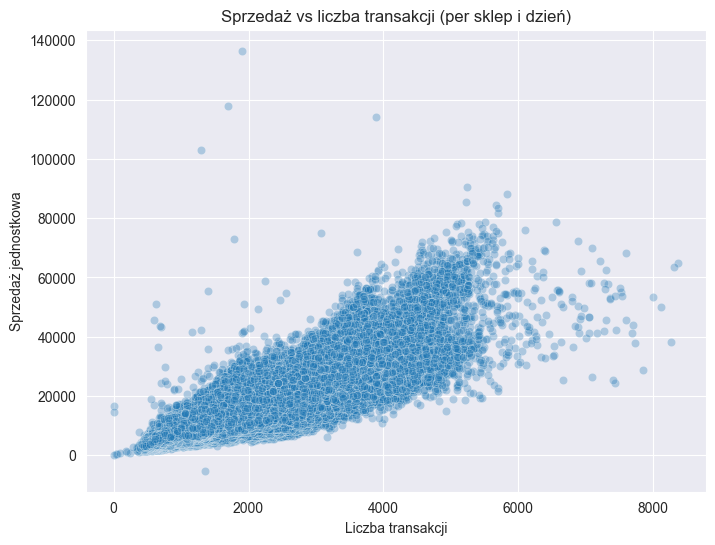

In [4]:
daily_stats = data.groupby(["date", "store_nbr"]).agg(total_sales=("unit_sales", "sum"), total_transactions=("transactions", "mean")).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=daily_stats, x="total_transactions", y="total_sales", alpha=0.3)
plt.title("Sprzedaż vs liczba transakcji (per sklep i dzień)")
plt.xlabel("Liczba transakcji")
plt.ylabel("Sprzedaż jednostkowa")
plt.show()

Macierz korelacji nam udowadnia to, że istnieje bardzo silna korelacja, wręcz liniowa pomiędzy liczbą transakcji a sprzedażą

In [5]:
corr = daily_stats[["total_transactions", "total_sales"]].corr()
corr

,total_transactions,total_sales
total_transactions,1.000000,0.837366
total_sales,0.837366,1.000000


## Dodanie kolumny day_name w celu zbadania jak dni tygodnia wpływają na sprzedaż

Możemy zauważyć, że największa sprzedaż jest pod koniec tygodnia a najmniejsza na początku. Jest to spowodowane weekendem, gdzie ludzie nie pracują i mają czas zrobić zakupy.

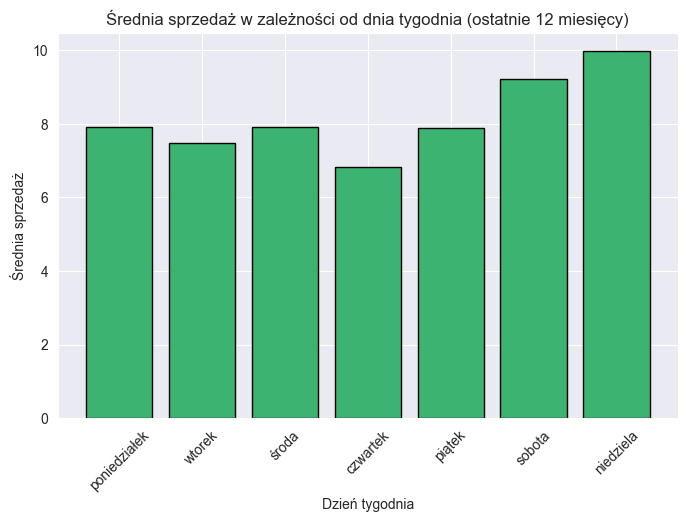

In [6]:
from datetime import timedelta

train["date"] = pd.to_datetime(train["date"])
max_date = train["date"].max()
train_last_year = train[train["date"] >= (max_date - timedelta(days=365))].copy()

train_last_year["day_of_week"] = train_last_year["date"].dt.dayofweek

day_map = {0:"poniedziałek", 1:"wtorek", 2:"środa", 3:"czwartek",
           4:"piątek", 5:"sobota", 6:"niedziela"}
train_last_year["day_name"] = train_last_year["day_of_week"].map(day_map)

day_order = ["poniedziałek","wtorek","środa","czwartek","piątek","sobota","niedziela"]
avg_sales_day = train_last_year.groupby("day_name")["unit_sales"].mean().reindex(day_order)

plt.figure(figsize=(8,5))
plt.bar(avg_sales_day.index, avg_sales_day.values, color="mediumseagreen", edgecolor="black")
plt.title("Średnia sprzedaż w zależności od dnia tygodnia (ostatnie 12 miesięcy)")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Średnia sprzedaż")
plt.xticks(rotation=45)
plt.show()